# Cheese Classification EDA and Models

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import warnings
warnings.filterwarnings('ignore')


## Loading Data

In [2]:
df = pd.read_csv('/kaggle/input/cheese-across-the-world/cheeses.csv')
df   

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Sveciaost,https://www.cheese.com/sveciaost/,cow,Sweden,Low-laying regions,NaN,"semi-hard, brined",45%,NaN,"creamy, supple",rindless,pale yellow,acidic,NaN,False,False,NaN,NaN,NaN
1183,Swag,https://www.cheese.com/swag/,goat,Australia,South Australia,NaN,"fresh firm, artisan",NaN,NaN,"creamy, crumbly",ash coated,white,"acidic, creamy",fresh,True,False,NaN,NaN,Woodside Cheese Wrights
1184,Swaledale,https://www.cheese.com/swaledale/,sheep,England,"Swaledale, North Yorkshire",NaN,hard,NaN,NaN,semi firm,NaN,yellow,"smooth, sweet",floral,True,False,Swaledale Sheep Cheese,NaN,NaN
1185,Sweet Style Swiss,https://www.cheese.com/sweet-style-swiss/,NaN,Switzerland,NaN,NaN,"semi-hard, artisan",NaN,NaN,"firm, supple",waxed,NaN,nutty,"nutty, sweet",False,False,NaN,NaN,NaN


## EDA

In [3]:
df.head()

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cheese           1187 non-null   object
 1   url              1187 non-null   object
 2   milk             1151 non-null   object
 3   country          1176 non-null   object
 4   region           855 non-null    object
 5   family           489 non-null    object
 6   type             1174 non-null   object
 7   fat_content      248 non-null    object
 8   calcium_content  25 non-null     object
 9   texture          1129 non-null   object
 10  rind             945 non-null    object
 11  color            1045 non-null   object
 12  flavor           1089 non-null   object
 13  aroma            929 non-null    object
 14  vegetarian       748 non-null    object
 15  vegan            748 non-null    object
 16  synonyms         294 non-null    object
 17  alt_spellings    109 non-null    

In [5]:
df.describe(include='all').T

,count,unique,top,freq
cheese,1187,1187,Swiss cheese,1
url,1187,1187,https://www.cheese.com/swiss/,1
milk,1151,21,cow,696
country,1176,82,United States,305
region,855,349,Wisconsin,67
family,489,21,Blue,94
type,1174,84,"semi-hard, artisan",133
fat_content,248,85,45%,50
calcium_content,25,24,492 mg/100g,2
texture,1129,309,creamy,162


In [6]:
df.describe().T

,count,unique,top,freq
cheese,1187,1187,Swiss cheese,1
url,1187,1187,https://www.cheese.com/swiss/,1
milk,1151,21,cow,696
country,1176,82,United States,305
region,855,349,Wisconsin,67
family,489,21,Blue,94
type,1174,84,"semi-hard, artisan",133
fat_content,248,85,45%,50
calcium_content,25,24,492 mg/100g,2
texture,1129,309,creamy,162


<Axes: >

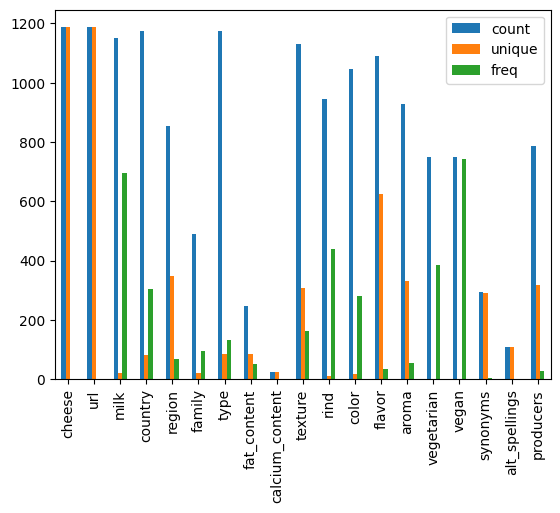

In [7]:
df.describe().T.plot(kind='bar')

In [8]:
df['vegan'].value_counts()

vegan
False    742
True       6
Name: count, dtype: int64

<Axes: xlabel='vegan'>

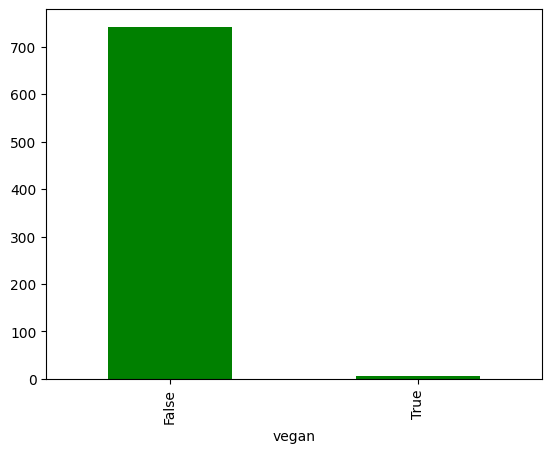

In [9]:
df['vegan'].value_counts().plot(kind='bar' ,color='g')

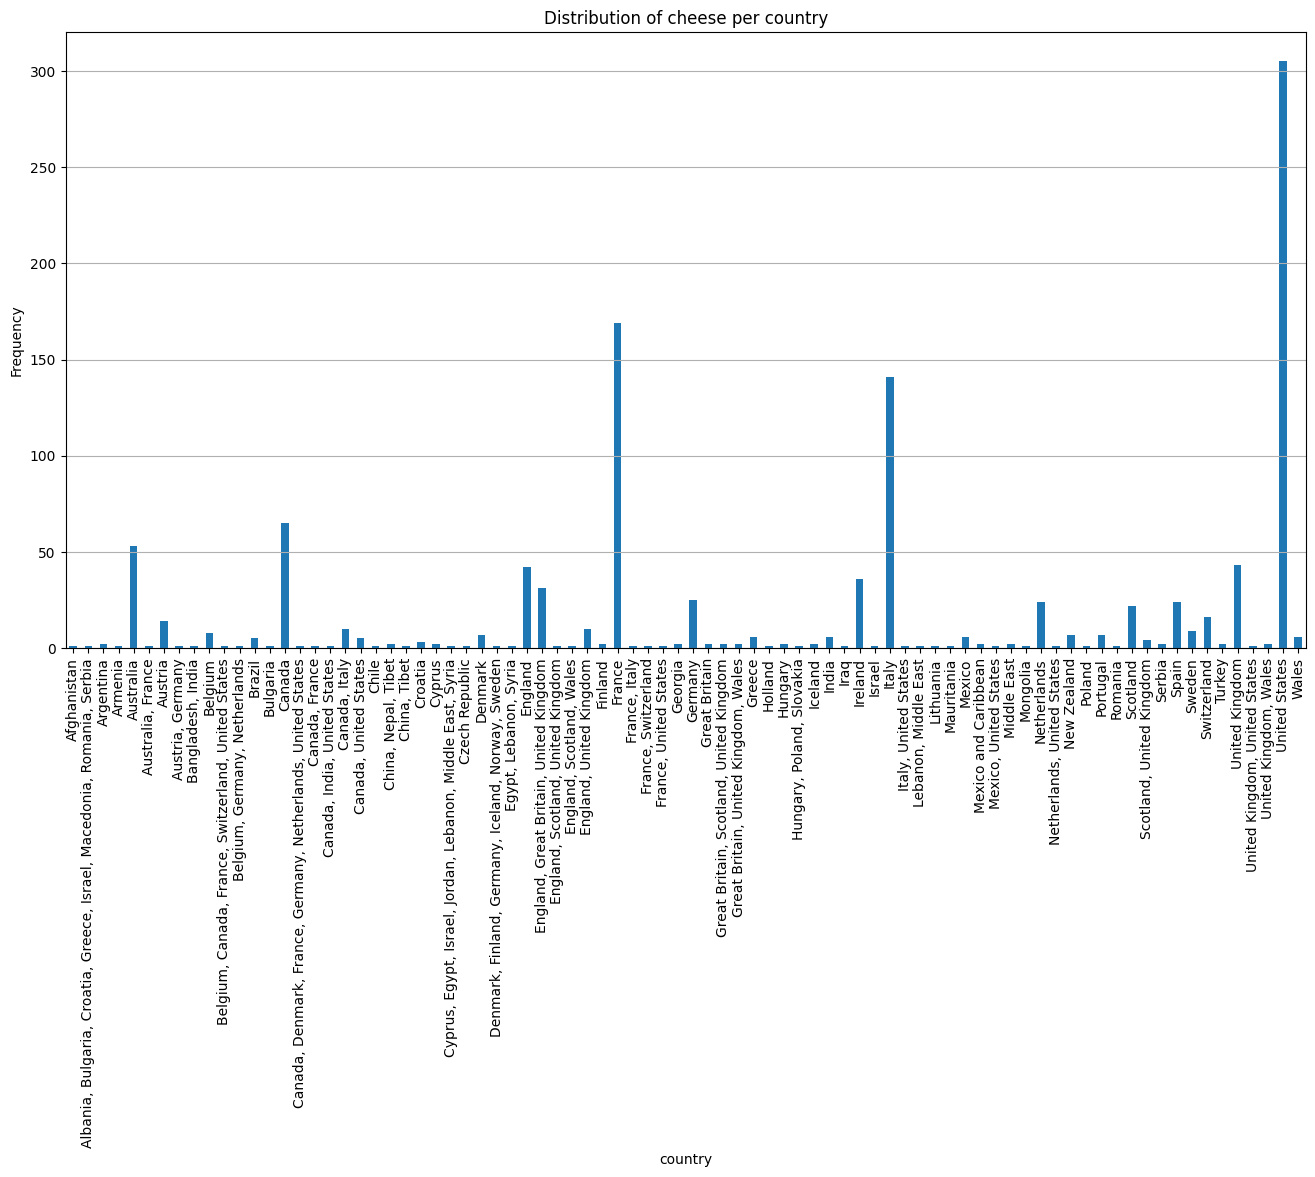

In [10]:
# Distribution of cheese per country
Freq = df["country"].value_counts().sort_index() \
          .plot(kind = "bar", title = "Distribution of cheese per country", figsize = (16, 8))
Freq.set_xlabel("country")
Freq.set_ylabel("Frequency")
plt.grid(True, axis='y')
plt.show()

In [11]:
df.columns.to_list()

['cheese',
 'url',
 'milk',
 'country',
 'region',
 'family',
 'type',
 'fat_content',
 'calcium_content',
 'texture',
 'rind',
 'color',
 'flavor',
 'aroma',
 'vegetarian',
 'vegan',
 'synonyms',
 'alt_spellings',
 'producers']

In [12]:
df['calcium (mg/100g)'] = df['calcium_content'].apply(func=lambda x: x if isinstance(x, float) else int(x.split()[0])) 
df.head()

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers,calcium (mg/100g)
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi,NaN
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN,NaN
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN,NaN
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN,NaN
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN,NaN


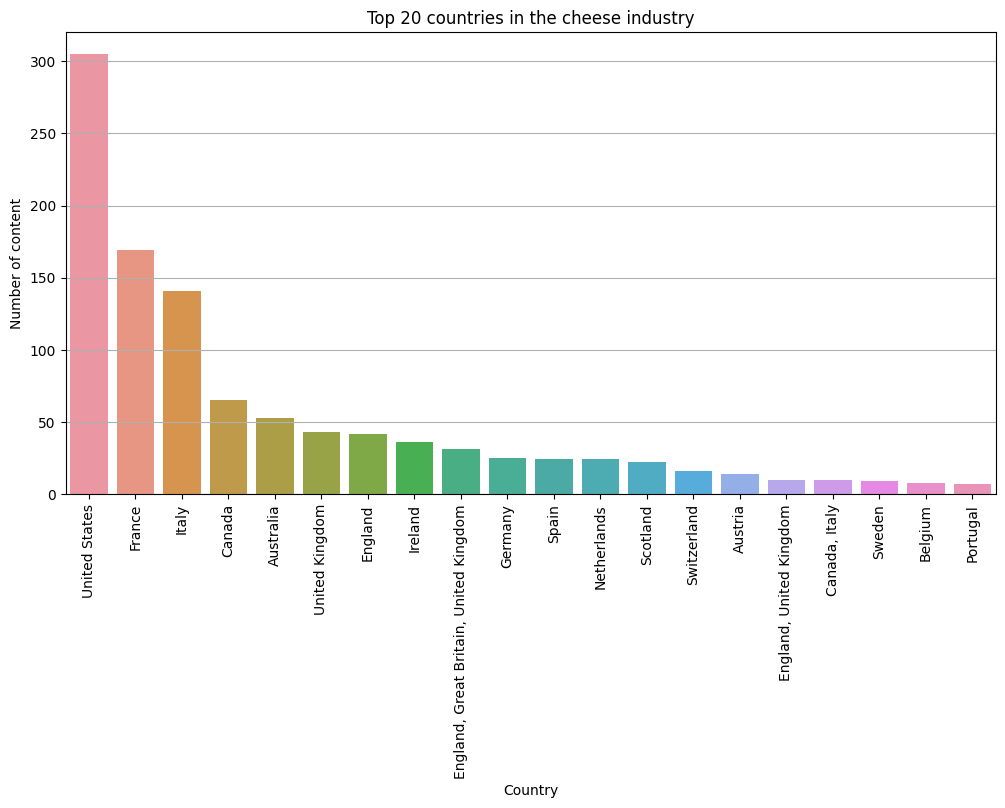

country
United States                             305
France                                    169
Italy                                     141
Canada                                     65
Australia                                  53
United Kingdom                             43
England                                    42
Ireland                                    36
England, Great Britain, United Kingdom     31
Germany                                    25
Spain                                      24
Netherlands                                24
Scotland                                   22
Switzerland                                16
Austria                                    14
England, United Kingdom                    10
Canada, Italy                              10
Sweden                                      9
Belgium                                     8
Portugal                                    7
Name: count, dtype: int64

In [13]:
top_countries = df['country'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 20 countries in the cheese industry')
plt.xlabel('Country')
plt.ylabel('Number of content')
plt.grid(True, axis='y')
plt.xticks(rotation=90)
plt.show()

top_countries

In [14]:
from plotly import express
for column in ['milk', 'family', 'fat_content', 'calcium (mg/100g)', 'rind', 'color', 'vegetarian', 'vegan']:
    express.histogram(data_frame=df, x=column).show()

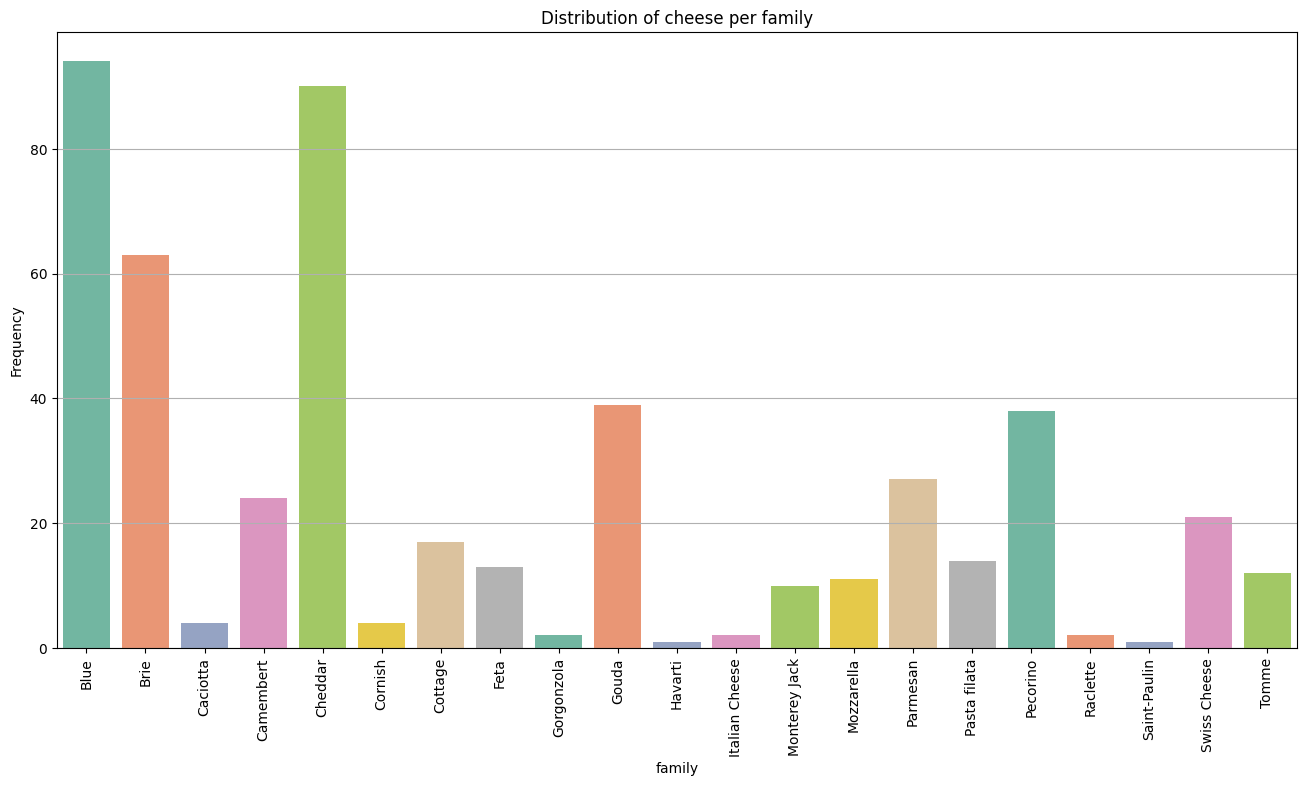

In [15]:
Distribution_milk = df['family'].value_counts().sort_index()
plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_milk.index, y=Distribution_milk.values, palette='Set2')
plt.title("Distribution of cheese per family")
plt.xlabel('family')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

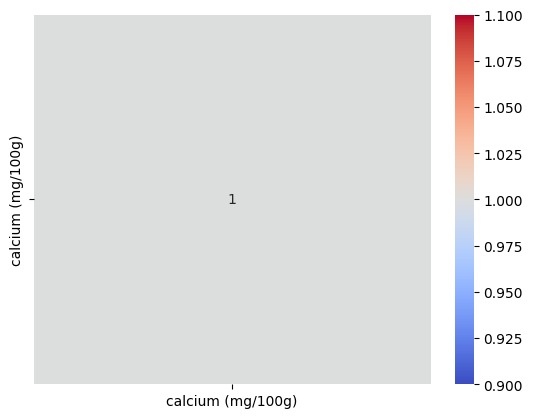

In [16]:
numeric_df = df.select_dtypes(include='number')
# Compute the correlation matrix
corr_matrix = numeric_df.corr()
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Display the heatmap
plt.show()

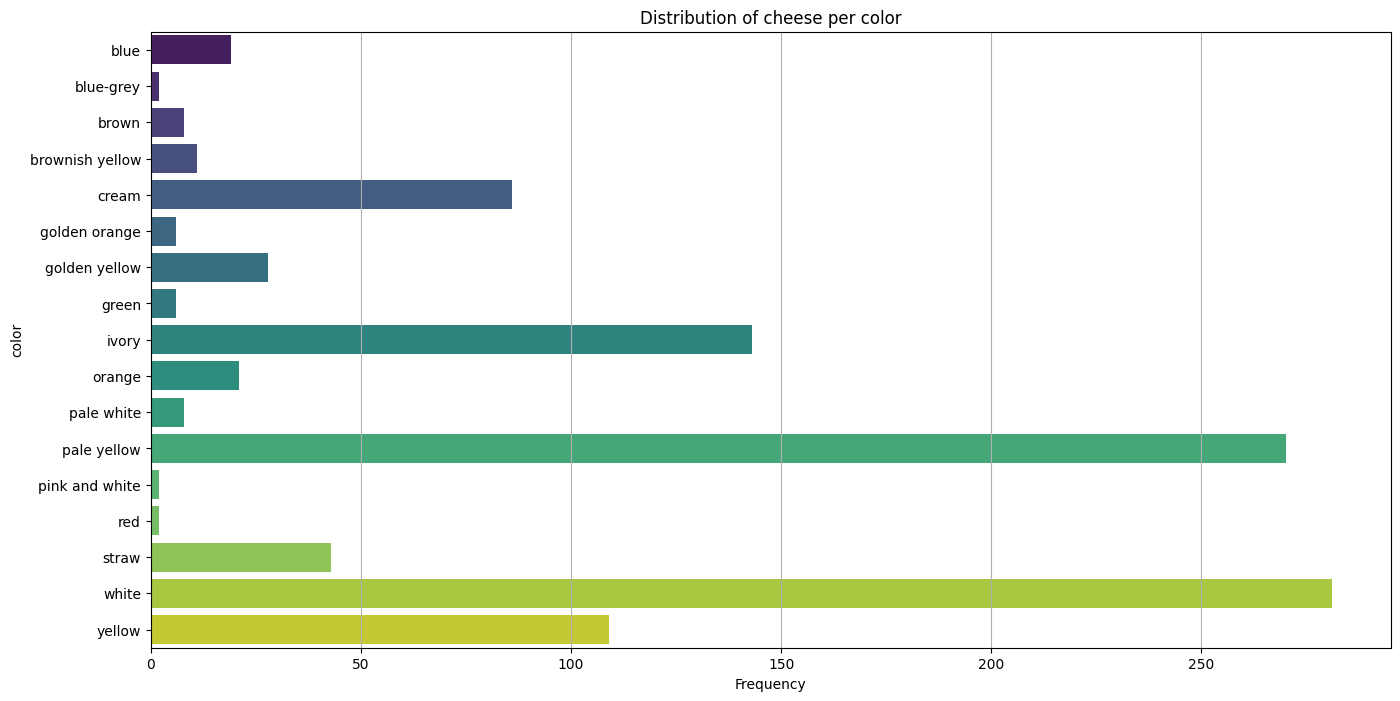

In [17]:
Distribution_color = df['color'].value_counts().sort_index()
plt.figure(figsize=(16, 8))
sns.barplot(y=Distribution_color.index, x=Distribution_color.values, palette='viridis')
plt.title("Distribution of cheese per color")
plt.ylabel('color')
plt.xlabel('Frequency')
plt.grid(True, axis='x')
plt.show()

In [18]:
from IPython.core.display import HTML
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'
HTML(df[0:20].to_html(escape=False,formatters=dict(url=path_to_image_html)))

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers,calcium (mg/100g)
0,Aarewasser,,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi,NaN
1,Abbaye de Belloc,,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN,NaN
2,Abbaye de Belval,,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN,NaN
3,Abbaye de Citeaux,,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN,NaN
4,Abbaye de Tamié,,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN,NaN
5,Abbaye de Timadeuc,,cow,France,province of Brittany,NaN,semi-hard,NaN,NaN,soft,washed,pale yellow,"salty, smooth",nutty,False,False,NaN,NaN,Abbaye Cistercienne NOTRE-DAME DE TIMADEUC,NaN
6,Abbaye du Mont des Cats,,cow,France,Nord-Pas-de-Calais,NaN,"semi-soft, artisan, brined",50%,NaN,"smooth, supple",washed,pale yellow,"milky, salty",floral,False,False,NaN,NaN,Abbaye du Mont des Cats,NaN
7,Abbot’s Gold,,cow,"England, Great Britain, United Kingdom",North Yorkshire,Cheddar,semi-hard,NaN,NaN,"creamy, crumbly, dense, semi firm",natural,pale yellow,"mild, sweet, tangy",aromatic,True,False,"Abbot's Gold Cheddar with Caramelised Onion, Caramelised Onion Cheddar, English Cheddar with Caramelized Onions",NaN,Wensleydale Creamery,NaN
8,Abertam,,sheep,Czech Republic,Karlovy Vary,NaN,"hard, artisan",45%,NaN,firm,natural,pale yellow,"acidic, strong, tangy",NaN,False,False,NaN,NaN,NaN,NaN
9,Abondance,,cow,France,NaN,NaN,"semi-hard, artisan",NaN,NaN,creamy,natural,pale yellow,nutty,"buttery, fruity",False,False,Tomme d'Abondance,NaN,NaN,NaN


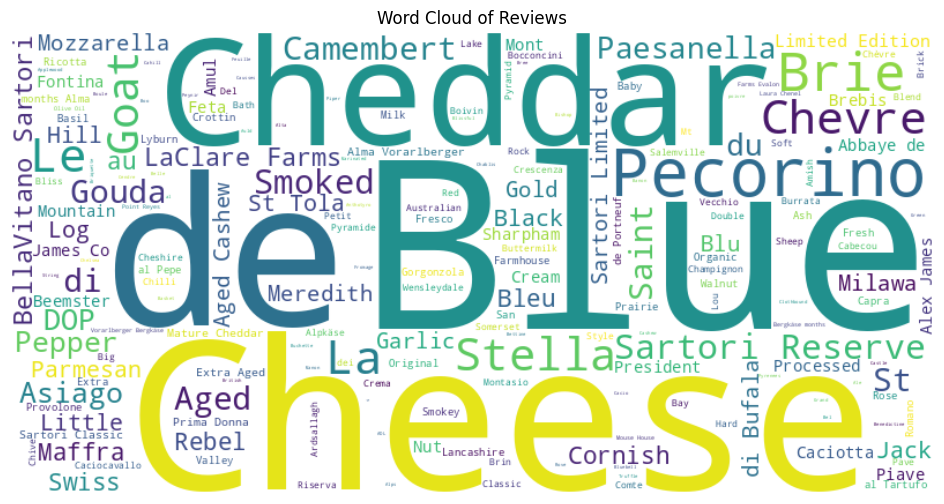

In [19]:
from wordcloud import WordCloud
reviews_text = ' '.join(df['cheese'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

In [20]:
import plotly.express as px
content_type = df.groupby(['milk']).size().reset_index(name='counts')
content_type
# Ploting Distribution of content ratings on Netflix
fig = px.pie(content_type, names = 'milk',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of cheese milk',height =  700 , width = 900)
fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'England'),
  Text(7, 0, 'Ireland'),
  Text(8, 0, 'England, Great Britain, United Kingdom'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'Scotland'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Austria'),
  Text(15, 0, 'England, United Kingdom'),
  Text(16, 0, 'Canada, Italy'),
  Text(17, 0, 'Sweden'),
  Text(18, 0, 'Belgium'),
  Text(19, 0, 'Portugal')])

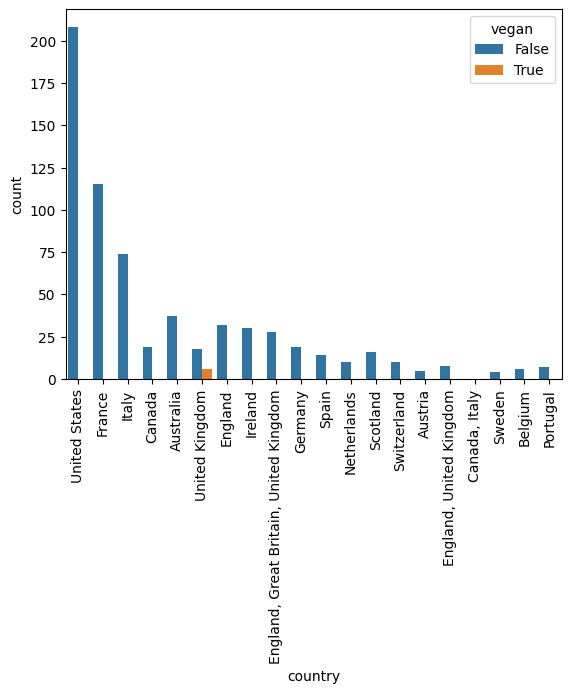

In [21]:
sns.countplot(x = df['country'], order = top_countries.index, hue = df['vegan'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'England'),
  Text(7, 0, 'Ireland'),
  Text(8, 0, 'England, Great Britain, United Kingdom'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'Scotland'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Austria'),
  Text(15, 0, 'England, United Kingdom'),
  Text(16, 0, 'Canada, Italy'),
  Text(17, 0, 'Sweden'),
  Text(18, 0, 'Belgium'),
  Text(19, 0, 'Portugal')])

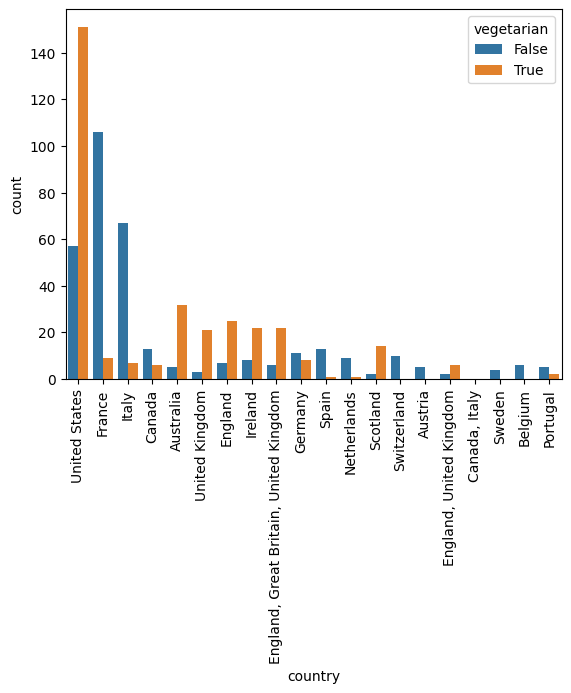

In [22]:
sns.countplot(x = df['country'], order = top_countries.index, hue = df['vegetarian'])
plt.xticks(rotation=90)

In [23]:
import plotly.express as px
fig = px.histogram(df, x="milk", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [24]:
import plotly.express as px
fig = px.histogram(df, x="country", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [25]:
import plotly.express as px
fig = px.histogram(df, x="vegan", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [26]:
import plotly.express as px
fig = px.histogram(df, x="family", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [27]:
import plotly.express as px
fig = px.histogram(df, x="type", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [28]:
import plotly.express as px
fig = px.histogram(df, x="fat_content", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [29]:
import plotly.express as px
fig = px.histogram(df, x="calcium_content", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [30]:
import plotly.express as px
fig = px.histogram(df, x="texture", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [31]:
import plotly.express as px
fig = px.histogram(df, x="rind", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [32]:
import plotly.express as px
fig = px.histogram(df, x="region", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [33]:
import plotly.express as px
fig = px.histogram(df, x="color", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [34]:
import plotly.express as px
fig = px.histogram(df, x="flavor", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [35]:
import plotly.express as px
fig = px.histogram(df, x="aroma", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [36]:
import plotly.express as px
fig = px.histogram(df, x="synonyms", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [37]:
import plotly.express as px
fig = px.histogram(df, x="alt_spellings", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [38]:
import plotly.express as px
fig = px.histogram(df, x="producers", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

## Data Preprocessing And Feature Engineering

### We are deleting columns with weak impact , clean the data , preprocess and conduct feature engineering

In [39]:
df=df.drop(['cheese','url','country','rind','family','color','vegan','type', 'milk', 'synonyms', 'alt_spellings', 'region', 'fat_content', 'calcium_content', 'calcium (mg/100g)'],axis=1)

df


,texture,flavor,aroma,vegetarian,producers
0,buttery,sweet,buttery,False,Jumi
1,"creamy, dense, firm",burnt caramel,lanoline,True,NaN
2,elastic,NaN,aromatic,False,NaN
3,"creamy, dense, smooth","acidic, milky, smooth","barnyardy, earthy",False,NaN
4,"creamy, open, smooth","fruity, nutty","perfumed, pungent",False,NaN
...,...,...,...,...,...
1182,"creamy, supple",acidic,NaN,False,NaN
1183,"creamy, crumbly","acidic, creamy",fresh,True,Woodside Cheese Wrights
1184,semi firm,"smooth, sweet",floral,True,NaN
1185,"firm, supple",nutty,"nutty, sweet",False,NaN


In [40]:
df.isnull().sum()

texture        58
flavor         98
aroma         258
vegetarian    439
producers     400
dtype: int64

In [41]:
df["texture"].fillna(df["texture"].mode()[0], inplace=True)
df["flavor"].fillna(df["flavor"].mode()[0], inplace=True)
df["aroma"].fillna(df["aroma"].mode()[0], inplace=True)
df["producers"].fillna(df["producers"].mode()[0], inplace=True)
df.shape

(1187, 5)

In [42]:
df

,texture,flavor,aroma,vegetarian,producers
0,buttery,sweet,buttery,False,Jumi
1,"creamy, dense, firm",burnt caramel,lanoline,True,Sartori
2,elastic,creamy,aromatic,False,Sartori
3,"creamy, dense, smooth","acidic, milky, smooth","barnyardy, earthy",False,Sartori
4,"creamy, open, smooth","fruity, nutty","perfumed, pungent",False,Sartori
...,...,...,...,...,...
1182,"creamy, supple",acidic,rich,False,Sartori
1183,"creamy, crumbly","acidic, creamy",fresh,True,Woodside Cheese Wrights
1184,semi firm,"smooth, sweet",floral,True,Sartori
1185,"firm, supple",nutty,"nutty, sweet",False,Sartori


In [43]:
df.dropna(subset= ["vegetarian"], inplace=True)
df.shape

(748, 5)

In [44]:
df

,texture,flavor,aroma,vegetarian,producers
0,buttery,sweet,buttery,False,Jumi
1,"creamy, dense, firm",burnt caramel,lanoline,True,Sartori
2,elastic,creamy,aromatic,False,Sartori
3,"creamy, dense, smooth","acidic, milky, smooth","barnyardy, earthy",False,Sartori
4,"creamy, open, smooth","fruity, nutty","perfumed, pungent",False,Sartori
...,...,...,...,...,...
1182,"creamy, supple",acidic,rich,False,Sartori
1183,"creamy, crumbly","acidic, creamy",fresh,True,Woodside Cheese Wrights
1184,semi firm,"smooth, sweet",floral,True,Sartori
1185,"firm, supple",nutty,"nutty, sweet",False,Sartori


In [45]:
y=df['vegetarian']
y

0       False
1        True
2       False
3       False
4       False
        ...  
1182    False
1183     True
1184     True
1185    False
1186     True
Name: vegetarian, Length: 748, dtype: object

In [46]:
df=df.drop('vegetarian', axis=1)

In [47]:
df

,texture,flavor,aroma,producers
0,buttery,sweet,buttery,Jumi
1,"creamy, dense, firm",burnt caramel,lanoline,Sartori
2,elastic,creamy,aromatic,Sartori
3,"creamy, dense, smooth","acidic, milky, smooth","barnyardy, earthy",Sartori
4,"creamy, open, smooth","fruity, nutty","perfumed, pungent",Sartori
...,...,...,...,...
1182,"creamy, supple",acidic,rich,Sartori
1183,"creamy, crumbly","acidic, creamy",fresh,Woodside Cheese Wrights
1184,semi firm,"smooth, sweet",floral,Sartori
1185,"firm, supple",nutty,"nutty, sweet",Sartori


In [48]:
y = y.astype(int)

In [49]:
y

0       0
1       1
2       0
3       0
4       0
       ..
1182    0
1183    1
1184    1
1185    0
1186    1
Name: vegetarian, Length: 748, dtype: int64

In [50]:
string_columns = df.select_dtypes(include=('object')).columns

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in string_columns:
    df[col] = le.fit_transform(df[col].astype('str'))

In [52]:
df

,texture,flavor,aroma,producers
0,9,463,40,119
1,91,57,176,187
2,197,165,0,187
3,93,28,36,187
4,123,266,207,187
...,...,...,...,...
1182,151,0,223,187
1183,73,10,101,228
1184,229,450,91,187
1185,217,379,206,187


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 1186
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   texture    748 non-null    int64
 1   flavor     748 non-null    int64
 2   aroma      748 non-null    int64
 3   producers  748 non-null    int64
dtypes: int64(4)
memory usage: 29.2 KB


In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df)
x

array([[-1.78091696,  1.51363391, -1.4735174 , -0.41336818],
       [-0.50250017, -1.40377292,  0.29792847,  0.68514588],
       [ 1.15008739, -0.62771396, -1.99453089,  0.68514588],
       ...,
       [ 1.64898175,  1.4202194 , -0.8092252 ,  0.68514588],
       [ 1.46189636,  0.9100325 ,  0.68868859,  0.68514588],
       [ 1.30599187,  1.02500419,  0.91011932,  1.12132058]])

#### Splitting data into train and test

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [56]:
len(X_train)

598

In [57]:
len(X_test)

150

### Model Building and Calculating Accuracy

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
svm = SVC()
random_forest = RandomForestClassifier(n_estimators=1000)
gradient_boosting = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()
extra_trees = ExtraTreesClassifier()
naive_bayes = GaussianNB()
xgboost = XGBClassifier()
catboost = CatBoostClassifier(verbose=0)

# Dictionary to store models and their respective accuracies
models = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Support Vector Machine': svm,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'AdaBoost': ada_boost,
    'Extra Trees': extra_trees,
    'Naive Bayes': naive_bayes,
    'XGBoost': xgboost,
    'CatBoost': catboost
}

# Dictionary to store accuracies
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

accuracies


{'K-Nearest Neighbors': 0.62,
 'Logistic Regression': 0.6333333333333333,
 'Decision Tree': 0.7133333333333334,
 'Support Vector Machine': 0.6466666666666666,
 'Random Forest': 0.72,
 'Gradient Boosting': 0.7666666666666667,
 'AdaBoost': 0.7266666666666667,
 'Extra Trees': 0.7,
 'Naive Bayes': 0.64,
 'XGBoost': 0.7266666666666667,
 'CatBoost': 0.74}

In [59]:
y_test

176    1
793    0
452    1
767    1
769    1
      ..
734    1
126    1
661    0
730    1
189    1
Name: vegetarian, Length: 150, dtype: int64

In [60]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

### Evaluation

K-Nearest Neighbors Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.65        76
           1       0.64      0.53      0.58        74

    accuracy                           0.62       150
   macro avg       0.62      0.62      0.62       150
weighted avg       0.62      0.62      0.62       150



Logistic Regression Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        76
           1       0.72      0.42      0.53        74

    accuracy                           0.63       150
   macro avg       0.66      0.63      0.61       150
weighted avg       0.66      0.63      0.62       150



Decision Tree Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        76
           1       0.70      0.73      0.72    

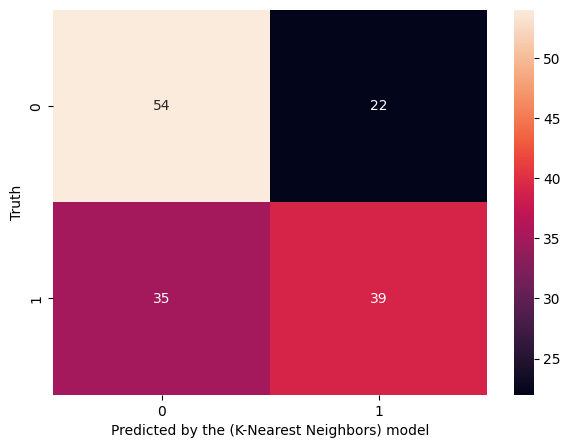

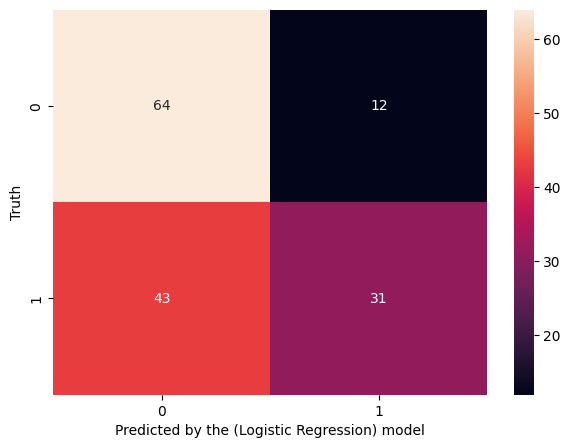

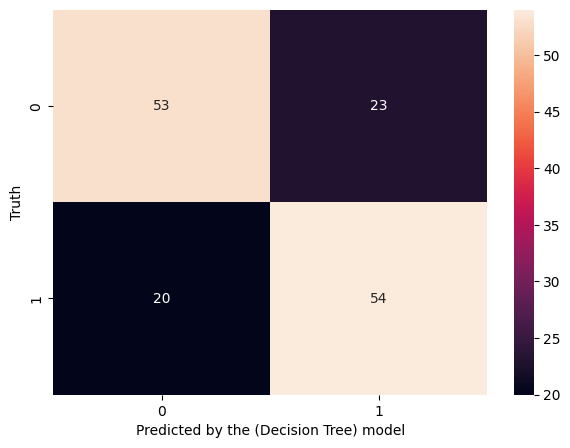

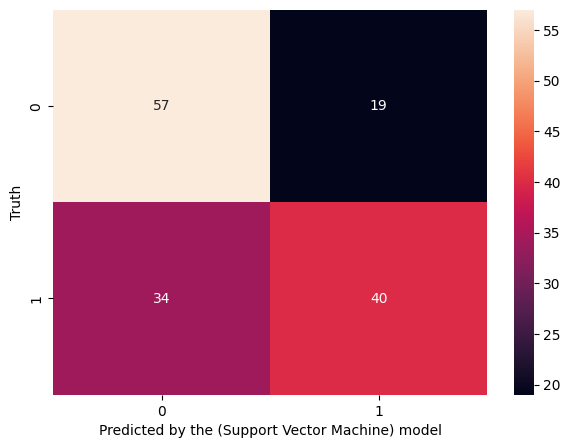

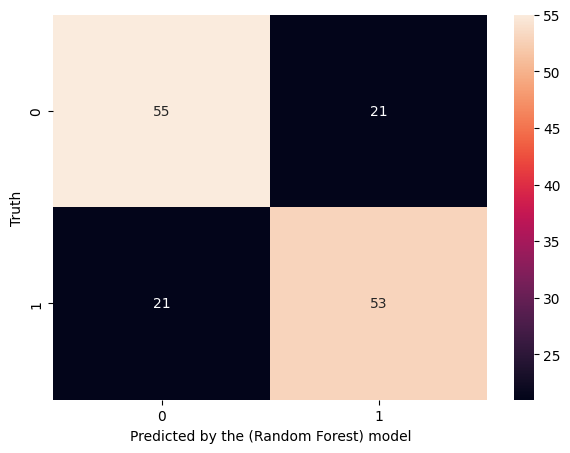

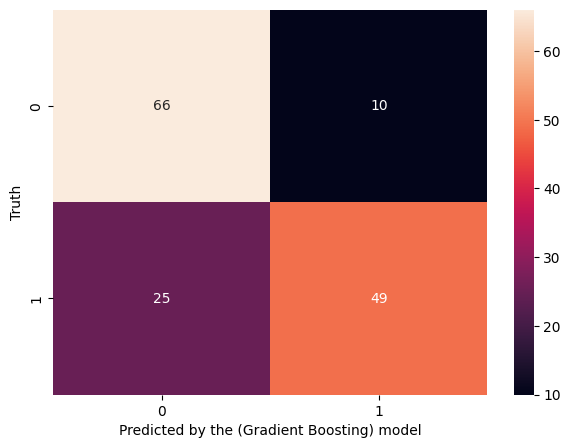

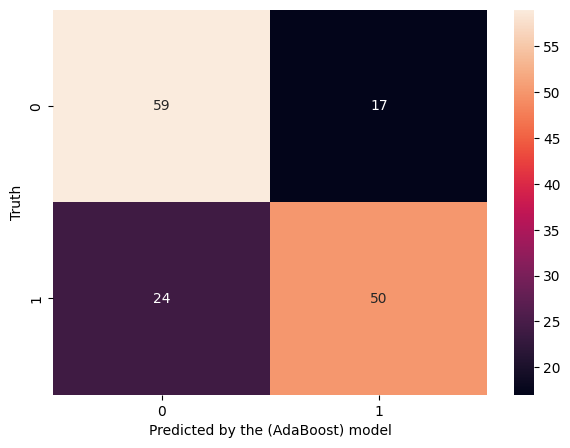

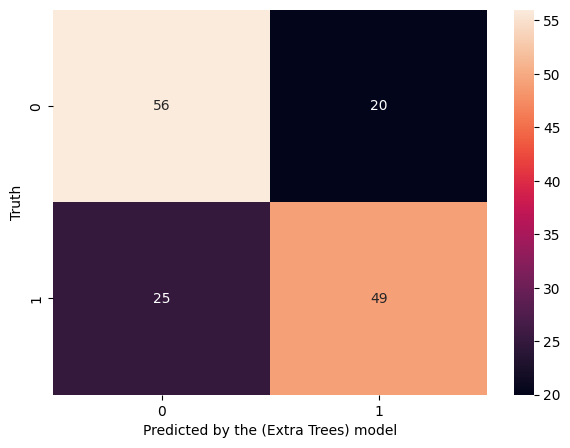

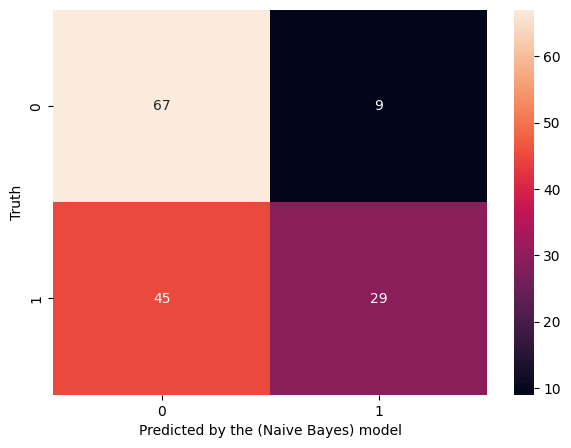

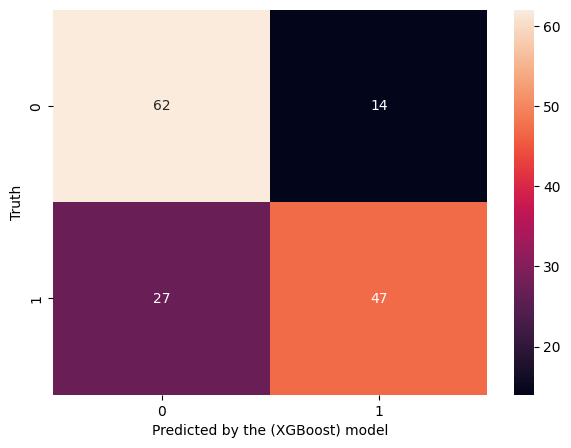

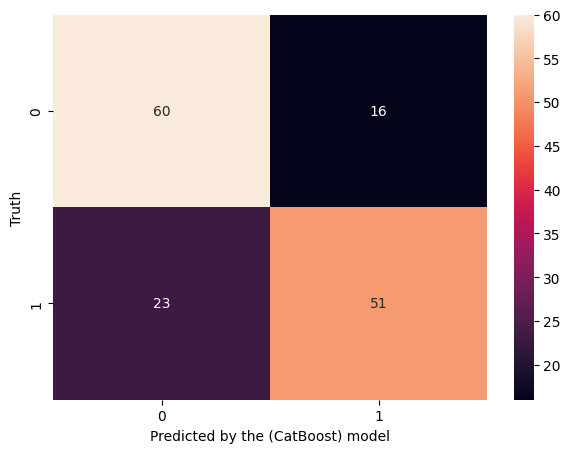

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
# Initializing a dictionary to store evaluation metrics
model_evaluation_metrics = {}

# Iterating over each model to evaluate
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)
    
    # Storing the results
    model_evaluation_metrics[model_name] = {
        "Confusion Matrix":cm,
        'Classification Report': classif_report
    }
    
     
    print(f"{model_name} Evaluation Metrics:")
    print("\nClassification Report:")
    print(classif_report)
    print("\n" + "="*60 + "\n")
    plt.figure(figsize=(7,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel(f"Predicted by the ({model_name}) model")
    plt.ylabel('Truth'),

In [62]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing a dictionary to store evaluation metrics
model_evaluation_metrics = {}

# Iterating over each model to evaluate
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing the results
    model_evaluation_metrics[model_name] = {
        "Confusion Matrix": cm,
        'Classification Report': classif_report
    }
    
    # Convert classification report to DataFrame
    classif_report_df = pd.DataFrame(classif_report).transpose()
    
    # Save classification report to CSV
    classif_report_df.to_csv(f"{model_name}_classification_report.csv", index=True)
    
    # Save confusion matrix to CSV
    cm_df = pd.DataFrame(cm, index=[f"True_{i}" for i in range(len(cm))], columns=[f"Pred_{i}" for i in range(len(cm))])
    cm_df.to_csv(f"{model_name}_confusion_matrix.csv", index=True)
    
    # Print results
    print(f"{model_name} Evaluation Metrics:")
    print("\nClassification Report:")
    print(tabulate(classif_report_df, headers='keys', tablefmt='psql'))
    print("\n" + "="*60 + "\n")
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
    plt.xlabel(f"Predicted by the ({model_name}) model")
    plt.ylabel('Truth')
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f"{model_name}_confusion_matrix.png")
    plt.close()

# Displaying the accuracies of all models
print("Model Accuracies:")
print(tabulate(pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy']), headers='keys', tablefmt='psql'))


K-Nearest Neighbors Evaluation Metrics:

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.606742 | 0.710526 |   0.654545 |     76    |
| 1            |    0.639344 | 0.527027 |   0.577778 |     74    |
| accuracy     |    0.62     | 0.62     |   0.62     |      0.62 |
| macro avg    |    0.623043 | 0.618777 |   0.616162 |    150    |
| weighted avg |    0.622826 | 0.62     |   0.616673 |    150    |
+--------------+-------------+----------+------------+-----------+


Logistic Regression Evaluation Metrics:

Classification Report:
+--------------+-------------+----------+------------+------------+
|              |   precision |   recall |   f1-score |    support |
|--------------+-------------+----------+------------+------------|
| 0            |    0.598131 | 0.842105 |   0.699454 |  76     